<a href="https://colab.research.google.com/github/telodigoensergio/somosnlp_reescritura_textos_administrativos/blob/main/Creaci%C3%B3n_del_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin
import pandas as pd
from requests.packages.urllib3.exceptions import InsecureRequestWarning
from requests.packages.urllib3 import disable_warnings

disable_warnings(InsecureRequestWarning)


In [ ]:
def extraer_links(lista_de_enlaces):
    todos_los_links = set()  # Utiliza un conjunto para evitar duplicados a nivel global

    for base_url in lista_de_enlaces:
        response = requests.get(base_url, verify=False)  # Haciendo la petición a la página principal
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        for link in soup.find_all('a'):
            href = link.get('href')
            if href and not href.startswith('#'):  # Ignorar enlaces internos de la página que comienzan con '#'
                full_url = urljoin(base_url, href)  # Convierte rutas relativas en absolutas usando la URL base
                todos_los_links.add(full_url)

    df_enlaces = pd.DataFrame(list(todos_los_links), columns=['Enlaces'])
    return df_enlaces


In [ ]:
def scrape_paragraphs(url, timeout=10):
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        for tag in soup(["script", "style", "meta", "link", "noscript", "header", "footer", "aside", "nav", "img"]):
            tag.extract()

        for cookie_alert in soup.find_all("div", class_=["alertaModal", "msg cookies oculto"]):
            cookie_alert.decompose()

        # Extraer los párrafos como elementos separados
        paragraphs = []
        for element in soup.body.find_all(['p']):  # Incluye también elementos de lista si es necesario
            text = element.get_text(separator=' ', strip=True)
            if text:
                paragraphs.append(text)

        return paragraphs  # Retorna la lista de párrafos directamente

    except requests.exceptions.Timeout:
        # Manejar el caso de tiempo de espera excedido
        print(f"La solicitud a {url} excedió el tiempo máximo de espera.")
        return []
    except Exception as e:
        print(f"Error occurred while scraping the data: {e}")
        return []


In [ ]:
lista_de_enlaces= ["https://www.hacienda.gob.es/es-ES/Paginas/Home.aspx",
                   "https://www.comunidad.madrid/",
                   "https://www.exteriores.gob.es/es/Paginas/index.aspx",
                   "https://www.mdsocialesa2030.gob.es/index.htm",
                   "https://www.defensa.gob.es/",
                   "https://portal.mineco.gob.es/es-es/Paginas/index.aspx",
                   "https://www.educacionyfp.gob.es/portada.html",
                   "https://www.igualdad.gob.es/",
                   "https://www.inclusion.gob.es/home",
                   "https://www.mdsocialesa2030.gob.es/",
                   "https://mpt.gob.es/index.html",
                   "https://www.sanidad.gob.es/",
                   "https://www.mites.gob.es/",
                   "https://www.transportes.gob.es/",
                   "https://www.mivau.gob.es/",
                   "https://www.interior.gob.es/opencms/es/inicio/",
                   "https://www.miteco.gob.es/es.html",
                   "https://avancedigital.mineco.gob.es/es-es/Paginas/index.aspx"]

df_enlaces = extraer_links(lista_de_enlaces)

In [ ]:
import time
import pandas as pd

def procesar_en_lotes(lista_de_enlaces, tamaño_del_lote=10, pausa=5):
    """
    Procesa una lista de enlaces en lotes, haciendo una pausa entre cada lote.

    Args:
        lista_de_enlaces (list): Lista de URLs a procesar.
        tamaño_del_lote (int): Número de enlaces a procesar en cada lote.
        pausa (int): Tiempo de pausa entre lotes, en segundos.

    Returns:
        list de listas: Lista de resultados del procesamiento de cada enlace.
    """
    lista_de_resultados = []
    for i in range(0, len(lista_de_enlaces), tamaño_del_lote):
        lote = lista_de_enlaces[i:i+tamaño_del_lote]
        resultados_del_lote = [scrape_paragraphs(enlace) for enlace in lote]
        lista_de_resultados.extend(resultados_del_lote)

        # Imprimir el progreso
        print(f"Procesados {i + len(lote)} de {len(lista_de_enlaces)} enlaces")

        # Esperar antes de procesar el siguiente lote
        time.sleep(pausa)
    return lista_de_resultados


lista_de_enlaces_en_df = df_enlaces['Enlaces'].tolist()

# Llamar a la función con la lista de enlaces
resultados = procesar_en_lotes(lista_de_enlaces_en_df, tamaño_del_lote=10, pausa=5)

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/publicaciones/gratuitas (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/empleo/Paginas/convocatorias.aspx (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 10 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/TID/noticias/Paginas/default.aspx (Caused by SSLError(SSLC

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='sede.maec.gob.es', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 90 de 1878 enlaces
Procesados 100 de 1878 enlaces
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://administracion.gob.es/pagFront/espanaAdmon/directorioOrganigramas/gobiernoEstado/gobiernoEstado.htm
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/economiayempresa/EconomiaInformesMacro (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 110 de 1878 enlaces

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 170 de 1878 enlaces
Procesados 180 de 1878 enlaces
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://administracionelectronica.gob.es/pae_Home
Procesados 190 de 1878 enlaces
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://administracion.gob.es
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/migraciones/entidades-colaboradoras1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /documents/20121/3479582/Informe+Proyec_SS+2023_final.pdf (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERT

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/Haciendagob
Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 210 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/el-ministerio/atencion-al-ciudadano (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='sede.maec.gob.es', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 220 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/organizacion (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/seguridad-social/autonomos (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 230 de 1878 enlaces
La solicitud a https://www.institucionpenitenciaria.es/es/inicio excedió el tiempo máximo de espera.
Procesados 240 de 1878 enlaces
Error occurred while scraping the data: 503 Server Error: Service Unav

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/incluinfo


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 290 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/comunicacion (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 300 de 1878 enlaces
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/MSocialGob?ref_src=twsrc%5Etfw
Procesados 310 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /ingreso-minimo-vital (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 429 Client Error: Too Many Requests for url: https://www.instagram.com/accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Finclusiongob%2F
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/ingreso-minimo-vital (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CER

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/infoservicios (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/migraciones/retorno-voluntario (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 350 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/digitalizacionIA/oficina-del-dato/Paginas/oficina-del-dato-se-digitalizacion-ia.asp

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='sede.maec.gob.es', port=443): Max retries exceeded with url: /procedimientos/portada/ida/925/idp/58 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 390 de 1878 enlaces
Error occurred while scraping the data: 403 Client Error: Forbidden for url: http://transparencia.gob.es/
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/migraciones/vivir-en-espana (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 400 de 1878 enlaces
Error occurred while scraping the data: 404 Client Error: Not found for url: https:/

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 430 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/brexit/residentes-y-trabajadores-en-espana (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 440 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.reddecasas.es', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f0257a63d30>: Failed to establish a new connection: [Errno 111] Connection refused'))
Error occurred while scraping the data: 429 Client Error: Too Many Requests for url: https://www.instagram.com/accounts

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://forma.administracionelectronica.gob.es/form/open/corp/9730/tYSI/tOCdhAWE
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/opi/estadisticas/observatorio_permanente_inmigracion (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 500 Server Error: Internal Server Error for url: https://expinterweb.mites.gob.es/participa/
Procesados 460 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/migraciones/prioridades-de-integracion (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFI

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 650 de 1878 enlaces
Procesados 660 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/tramites/altas-bajas-seguridad-social (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/mitecogob


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 670 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/comunicacion/noticias (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/TID (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 680 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/economiayempresa/unidadmercado/competencia (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 690 de 1878 enlaces
Error occurred while scraping the data: 429 Client Error: Too Many Requests for url: https://www.instagram.com/accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fmsocialgob%2F
Error occurred while scraping the data: HTTPSConnectionPool(host='ucraniaurgente.inclusion.gob.es', port=443): Max retries exceeded with url: /home (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occur

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 910 de 1878 enlaces
Procesados 920 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='sede.maec.gob.es', port=443): Max retries exceeded with url: /pagina/index/directorio/citaprevia (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://transparencia.gob.es/


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/igualdadgenero/articulos (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 930 de 1878 enlaces
Error occurred while scraping the data: 429 Client Error: Too Many Requests for url: https://www.instagram.com/accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fmiteco.gob%2F
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/inclusion/estudios (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 940 de 1878 enlaces


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://generaciond.gob.es/
Procesados 950 de 1878 enlaces
Procesados 960 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /privacidad (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /oberaxe/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 970 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): 

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1070 de 1878 enlaces


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: 404 Client Error: Not Found for url: https://www.mivau.gob.es/vivienda/actividades-servicios/urbanismo-y-politica-de-suelo/estudios-y-publicaciones
Procesados 1080 de 1878 enlaces
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/viviendagob
Error occurred while scraping the data: 429 Client Error: Too Many Requests for url: https://www.instagram.com/accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Ftrabajogob%2F%3Fhl%3Des
Procesados 1090 de 1878 enlaces


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='www.bonosocial.gob.es', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1007)')))
Procesados 1100 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/migraciones/oberaxe (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1110 de 1878 enlaces
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/ComunidadMadrid
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/ucrania-urg

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1140 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/publicaciones (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/seguridad-social/altas-y-bajas (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1150 de 1878 enlaces
Error occurred while scraping the data: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Error occurred while scraping the data: 429 Client Erro

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1160 de 1878 enlaces
La solicitud a https://avancedigital.mineco.gob.es/es-es/Paginas/Programas.aspx excedió el tiempo máximo de espera.
Procesados 1170 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/organizacion/se-migraciones (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/infoservicios/perfilcontratante (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1180 de 1878 enlaces


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1190 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/participacionpublica/consultapublica (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 464, in getresponse
    assert_header_parsing(httplib_response.msg)
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/response.py", line 88, in assert_header_parsing
    raise HeaderParsingError(defects=defects, unparsed_data=unparsed_data)
urllib3.exceptions.HeaderParsingError: [MissingHeaderBodySeparatorDefect()], unparsed data: "Content-security-policy : base-uri 'self'; object-src 'none'; media-src 'self'; child-src 'none'; frame-ancestors 'none'; connect-src 'self' https://*.google-analytics.com/; manifest-src 'self'; frame-src 'self' https://www.google.com/\r\nX-frame-options: DENY\r\nX-xss-protection: 1; mode=block\r\nX-content-type-options: nosniff\r\n\r\n"


Procesados 1200 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.csd.gob.es', port=443): Max retries exceeded with url: /test.php/es/csd/organizacion/estructura-y-equipo-directivo (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1210 de 1878 enlaces
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/territorialgob
Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /aviso-legal (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1220 de 1878 enlaces
Error occurred while scraping the data: HTT

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1250 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /sitemap (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 429 Client Error: Too Many Requests for url: https://www.instagram.com/accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fviviendagob%2F
Procesados 1260 de 1878 enlaces
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://www.un.org/sustainabledevelopment/es/2015/09/la-asamblea-general-adopta-la-agenda-2030-para-el-desarrollo-sostenible/
Procesados 1270 de 1878 enlaces


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1280 de 1878 enlaces
La solicitud a https://mpt.gob.es/prensa/agenda.html excedió el tiempo máximo de espera.
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/migraciones/integracion (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /estadisticas (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1290 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded wit

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='datos.gob.es', port=443): Max retries exceeded with url: /es/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1340 de 1878 enlaces


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
La solicitud a https://ssweb.seap.minhap.es/portalCCAA/ excedió el tiempo máximo de espera.
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/propuestas-legislativas-europeas (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 404 Client Error: Not Found for url: https://prensa.mites.gob.es/webPrensa/index.htm
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/laoposicionquellevatunombre (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1350 de 

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1390 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/Paginas/Accesibilidad.aspx (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://spanish-presidency.consilium.europa.eu/
Procesados 1400 de 1878 enlaces
Procesados 1410 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /gl-es/Paxinas/index.aspx (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/biblioteca (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/comunicacion/Paginas/default.aspx (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1420 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/igualdadgenero/noticias (Caused by SSLError(SSLCertVerificationError(

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/migraciones/normativa (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1490 de 1878 enlaces
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/_minecogob
Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: 404 Client Error: Not found for url: https://www.sanidad.gob.es/profesionales/portada/home.htm
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/min

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1520 de 1878 enlaces
Procesados 1530 de 1878 enlaces
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/interiorgob
Error occurred while scraping the data: 404 Client Error: Not Found for url: https://prensa.mites.gob.es/webPrensa/multimedia/videos
Procesados 1540 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /sede-electronica (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/empleo (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify fa

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1570 de 1878 enlaces
Error occurred while scraping the data: 403 Client Error: Forbidden for url: http://administracion.gob.es/pag_Home/actualidadParticipacion/ParticipacionPublicaProyectosNormativos0.html
Procesados 1580 de 1878 enlaces
Error occurred while scraping the data: 404 Client Error: Not Found for url: https://www.mites.gob.es/opencms/INTERNET/https:/www.fondoseuropeos.hacienda.gob.es/sitios/dgfc/es-ES/paginas/feder.aspx
Procesados 1590 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/digitalizacionIA/Paginas/Semana-de-la-Administracion-Abierta.aspx (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1600 de 1878 enlaces
Error occurred while scraping the

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1660 de 1878 enlaces
Procesados 1670 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/el-ministerio (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1680 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/comunicacion/galeria (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1690 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/brexit/seguridad-social (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='www.senasa.es', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/economiayempresa/unidadmercado/mejoraregulacion (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIF

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /documents/20121/970399/GUIA_sector_audiovisual_terceros.pdf/2f29f04c-8edc-69b2-25b6-0be41a04b461?t=1652263059474 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1730 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='www.csd.gob.es', port=443): Max retries exceeded with url: /es (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 400 Client Error: Bad Request for url: https://twitter.com/setelecogob?lang=es
Procesados 1740 de 1878 enlaces
Error occurred while scra

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: 403 Client Error: Forbidden for url: https://administracion.gob.es
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /w/la-ministra-elma-saiz-subraya-la-importante-proteccion-social-del-gobierno-en-melilla-donde-las-politicas-de-inclusion-benefician-a-una-de-cada-cinco-personas (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1790 de 1878 enlaces
Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Procesados 1800 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/economiayempresa/unidadmercado (Caused by SSLError(SSLCertVe

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/migraciones/vivir-en-el-extranjero (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/participacionpublica (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1830 de 1878 enlaces


Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: HTTPSConnectionPool(host='portal.mineco.gob.es', port=443): Max retries exceeded with url: /es-es/ministerio/estrategias/paginas/Esquema_Nacional_de_Seguridad.aspx (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1840 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnectionPool(host='sede.fogasa.mites.gob.es', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Error occurred while scraping the data: 404 Client Error: Not found for url: https://www.sanidad.gob.es/mapaWeb/cargar.do
Procesados 1850 de 1878 enlaces
Error occurred while scraping the data: HTTPSConnection

Error occurred while scraping the data: 'NoneType' object has no attribute 'find_all'
Error occurred while scraping the data: 429 Client Error: Too Many Requests for url: https://www.instagram.com/accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fmiteco.gob%2F
Error occurred while scraping the data: HTTPSConnectionPool(host='www.inclusion.gob.es', port=443): Max retries exceeded with url: /web/guest/comunicacion/revistas (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))
Procesados 1878 de 1878 enlaces


In [ ]:
#Para cada link se extraen los párrafos

#lista_de_listas = [scrape_paragraphs(enlace) for enlace in df_enlaces['Enlaces']]

# Preparar los datos para el DataFrame
datos = [(df_enlaces['Enlaces'].iloc[i], parrafo) for i, lista in enumerate(resultados) for parrafo in lista]

# Convertir en DataFrame
df_parrafos = pd.DataFrame(datos, columns=['Enlace', 'Párrafo'])



In [ ]:
df_parrafos.to_csv('párrafos.csv')

In [ ]:
def crear_grupos_superpuestos(paragraphs):
    # Generar grupos de párrafos superpuestos
    grupos_superpuestos = [paragraphs[i:i+5] for i in range(0, len(paragraphs) - 1, 2)]
    # Convierte cada grupo en un string
    strings_de_grupos = [' '.join(grupo) for grupo in grupos_superpuestos]
    return strings_de_grupos

In [ ]:

#PARA PÁRRAFOS SUELTOS Y TEXTOS COMPLETOS:
# Paso 1: Filtrar los párrafos por el recuento de palabras para eliminar párrafos que no contengan casi información
df_parrafos_filtrados = df_parrafos[df_parrafos['Párrafo'].apply(lambda x: len(x.split()) >= 15)]

#PARA UNIR LOS PÁRRAFOS
# Paso 2: Agrupar los párrafos filtrados por enlace y aplicar crear_grupos_superpuestos
df_grupos = df_parrafos_filtrados.groupby('Enlace')['Párrafo'].apply(lambda x: crear_grupos_superpuestos(x.tolist())).reset_index(name='Grupos')

# Paso 3: Convertir cada grupo de párrafos en su propia fila
df_grupos_expandidos = df_grupos.explode('Grupos').reset_index(drop=True)

# Paso 4: Unir los grupos superpuestos por enlace en un solo texto
df_unidos_por_enlace = df_grupos_expandidos.groupby('Enlace')['Grupos'].apply(lambda x: ' '.join([str(grupo) for grupo in x if grupo is not None])).reset_index(name='Texto Unido')




In [ ]:
#SOLO PARA PÁRRAFOS:


df_parrafos_filtrados.to_csv('párrafos_más_de_15wds.csv')

<ipython-input-116-7c70f9f105fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parrafos_filtrados['Longitud'] = df_parrafos_filtrados['Párrafo'].apply(lambda x: len(x.split()))


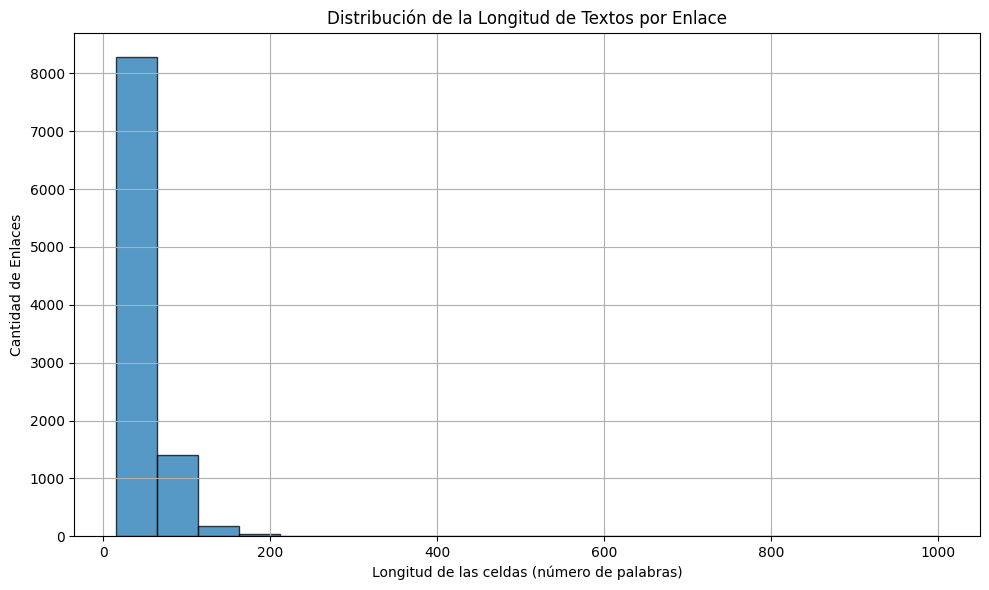

In [ ]:
import matplotlib.pyplot as plt
#Calculamos la longitud de cada celda
#df_unidos_por_enlace['Longitud'] = df_unidos_por_enlace['Texto Unido'].apply(lambda x: len(x.split()))

#PARA PÁRRAFOS:
df_parrafos_filtrados['Longitud'] = df_parrafos_filtrados['Párrafo'].apply(lambda x: len(x.split()))

# Crear un histograma de la longitud de los textos
plt.figure(figsize=(10, 6))

#Para textos completos
#plt.hist(df_unidos_por_enlace['Longitud'], bins=20, alpha=0.75, edgecolor='black')

#Para párrafos
plt.hist(df_parrafos_filtrados['Longitud'], bins=20, alpha=0.75, edgecolor='black')


plt.xlabel('Longitud de las celdas (número de palabras)')
plt.ylabel('Cantidad de Enlaces')
plt.title('Distribución de la Longitud de Textos por Enlace')

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_menos_de_600 = df_parrafos_filtrados[(df_parrafos_filtrados['Longitud'] >= 40) & (df_parrafos_filtrados['Longitud'] <= 300)]


In [ ]:
df_mas_de_600 = df_unidos_por_enlace[df_unidos_por_enlace['Longitud'] > 600  & (df_unidos_por_enlace['Longitud'] <= 1000)]


In [ ]:
#DESCARGAMOS EL DF

df_menos_de_600.to_csv('párrafos_entre_40y300wds.csv')


In [ ]:
df_mas_de_600.to_csv('masde600.csv')

In [ ]:
#FUNCIÓN POR SI QUEREMOS DIVIDIR LOS PÁRRAFOS MÁS LARGOS

def dividir_en_tres(texto):
    palabras = texto.split()
    longitud_total = len(palabras)
    tercio = longitud_total // 3
    # Asegurarse de que tercio sea al menos 1 para evitar divisiones por cero.
    tercio = max(tercio, 1)

    # Dividir el texto en tres partes
    parte1 = ' '.join(palabras[:tercio])
    parte2 = ' '.join(palabras[tercio:tercio*2])
    parte3 = ' '.join(palabras[tercio*2:])

    return parte1, parte2, parte3

# Aplicar la función de división a cada fila y expandir los resultados
# Usaremos .apply(pd.Series) para convertir las tuplas resultantes en columnas separadas
df_trozos = df_mas_de_600['Texto Unido'].apply(lambda x: dividir_en_tres(x)).apply(pd.Series)

# Opcional: si quieres mantener los enlaces asociados con cada texto, asegúrate de incluir esa información
df_trozos['Enlace'] = df_mas_de_600['Enlace'].values

# Renombrar las columnas para reflejar que son partes de textos
df_trozos.columns = ['Parte 1', 'Parte 2', 'Parte 3', 'Enlace']

# Para un procesamiento posterior, es posible que quieras tener cada parte en su propia fila en lugar de en columnas separadas
df_trozos_melt = df_trozos.melt(id_vars=['Enlace'], value_vars=['Parte 1', 'Parte 2', 'Parte 3'],
                                var_name='Parte', value_name='Texto')


In [ ]:
df_trozos_melt.to_csv('trozos.csv')

In [2]:
!pip install groq

from groq import Groq
from google.colab import userdata

client = Groq(
    api_key=userdata.get("GROQ_API_KEY"),
)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00


In [ ]:
#FUNCIÓN PARA USAR MIXTRAL EN EL DATASET

def clarify_text (text):
  prompt = """Eres un experto en lenguaje claro en español que convierte cualquier texto en accesible y fácil de entender para todos. El texto original es sobre un tema específico (por ejemplo, un procedimiento administrativo, una descripción de un servicio, etc.) y quiero que sea reformulado siguiendo las pautas de lenguaje claro. Aquí están las directrices que me gustaría que siguieras:

1. ESCRIBE DIRECTAMENTE EL TEXTO ACCESIBLE, SIN NINGUNA INTRODUCCIÓN COMO "TEXTO CLARO:", "TEXTO ACCESIBLE", O "AQUÍ TIENES EL TEXTO:".
2. Bajo ninguna circunstancia escribas el texto original.

3. Simplifica el vocabulario: Usa palabras sencillas y evita términos técnicos o jerga especializada. Cuando sea necesario utilizar un término técnico, incluye una breve explicación en términos simples.
4. Sustituye las palabras difíciles administrativas por su explicación.
5. Organiza la información en puntos o pasos claros: Esto ayuda a que el texto sea más fácil de seguir. Usa viñetas o números para los pasos o puntos importantes.

6. Evita las oraciones largas y complicadas: Trata de mantener las oraciones cortas y al punto. Una idea por oración.

7. Usa la voz activa en lugar de la pasiva: Esto hace que el texto sea más directo y fácil de leer.


El objetivo es que el texto sea comprensible para adolescentes de 14 años, personas con un nivel básico de español, y aquellos con un bajo grado de alfabetización.
IMPORTANTE: ESCRIBE SOLO EN ESPAÑOL!!!
El texto es el siguiente:
"""
  if text is None:
    return " "

  if text is not None:
    input = prompt + text
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": input,
                }
    ],
        model="mixtral-8x7b-32768",
        temperature = 0.2
        )
    clarified_text = (chat_completion.choices[0].message.content)
  return clarified_text

In [ ]:
#FUNCIÓN CON PAUSA PARA NO SOBRECARGAR LA API


def rellenar_texto_claro_con_pausas(df, incremento=20, pausa=60):
    # Crear un nuevo DataFrame solo con la columna 'Texto Unido'
    df_nuevo = df[['Texto Unido']].copy()

    # Inicializar una nueva columna 'texto limpio' en el DataFrame nuevo
    df_nuevo['texto limpio'] = None

    total_filas = len(df_nuevo)
    for inicio in range(0, total_filas, incremento):
        fin = min(inicio + incremento, total_filas)

        # Aplica la función clarify_text solo al segmento deseado y actualiza el nuevo DataFrame
        df_nuevo['texto limpio'].iloc[inicio:fin] = df_nuevo['Texto Unido'].iloc[inicio:fin].apply(clarify_text)
        print(f"Rellenadas hasta la fila {fin}.")

        # Si no es la última iteración, pausa
        if fin < total_filas:
            print(f"Pausando {pausa} segundos...")
            time.sleep(pausa)

    return df_nuevo

In [ ]:
df_menos_de_600.rename(columns={'Párrafo': 'Texto Unido'}, inplace=True)

<ipython-input-122-5f17ed9b69b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_menos_de_600.rename(columns={'Párrafo': 'Texto Unido'}, inplace=True)


In [ ]:
df_nuevo = rellenar_texto_claro_con_pausas(df_menos_de_600)

Rellenadas hasta la fila 20.
Pausando 60 segundos...
Rellenadas hasta la fila 40.
Pausando 60 segundos...
Rellenadas hasta la fila 60.
Pausando 60 segundos...
Rellenadas hasta la fila 80.
Pausando 60 segundos...
Rellenadas hasta la fila 100.
Pausando 60 segundos...
Rellenadas hasta la fila 120.
Pausando 60 segundos...
Rellenadas hasta la fila 140.
Pausando 60 segundos...
Rellenadas hasta la fila 160.
Pausando 60 segundos...
Rellenadas hasta la fila 180.
Pausando 60 segundos...
Rellenadas hasta la fila 200.
Pausando 60 segundos...
Rellenadas hasta la fila 220.
Pausando 60 segundos...
Rellenadas hasta la fila 240.
Pausando 60 segundos...
Rellenadas hasta la fila 260.
Pausando 60 segundos...
Rellenadas hasta la fila 280.
Pausando 60 segundos...
Rellenadas hasta la fila 300.
Pausando 60 segundos...
Rellenadas hasta la fila 320.
Pausando 60 segundos...
Rellenadas hasta la fila 340.
Pausando 60 segundos...
Rellenadas hasta la fila 360.
Pausando 60 segundos...
Rellenadas hasta la fila 380.
Pa

In [ ]:
df_nuevo.to_csv('evaluado.csv')

In [3]:
#RESTAURAMOS EL DATASET:

df_nuevo = pd.read_csv('dataset.csv')

In [10]:
print(df_nuevo.head(20))

    Unnamed: 0                                        Texto Unido  \
0            0  El Ministerio de Transportes y Movilidad Soste...   
1            1  El Ministerio de Transportes y Movilidad Soste...   
2            2  El Ministerio de Transportes y Movilidad Soste...   
3            3  El Ministerio de Transportes y Movilidad Soste...   
4            4  El Ministerio de Transportes y Movilidad Soste...   
5            5  El secretario de Estado de Transportes y Movil...   
6            6  El Ministerio de Transportes y Movilidad Soste...   
7            7  El ministro de Transportes y Movilidad Sosteni...   
8            8  El ministro de Transportes y Movilidad Sosteni...   
9            9  El ministro de Transportes y Movilidad Sosteni...   
10          13  Las homologaciones en España de los títulos ob...   
11          17  Los alumnos que proceden de cualquier sistema ...   
12          18  En relación a los estudios de Formación Profes...   
13          21  Para ejercer la pr

In [14]:
def eval_rewrite (text_org, text_reesc):
  prompt ="""Eres un experto en lenguaje claro en español.
  Dado un par de textos, evalúa si el segundo texto presenta la misma información que el segundo, pero de de forma más clara. Responde únicamente "SÍ" o "NO"
IMPORTANTE: CÍÑETE A LA RESPUESTA (SÍ o NO), NO ESCRIBAS NADA MÁS

Los textos son los siguientes:
"""
  input = prompt + "texto original: " + text_org + "texto reescrito: "

  chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": input,
        }
    ],
    model="llama2-70b-4096",
)

  return (chat_completion.choices[0].message.content)

In [15]:
#PROBAMOS CON LOS PROMPTS

df_nuevo_pruebas = df_nuevo.head(20)
df_nuevo_pruebas['Evaluación'] = df_nuevo_pruebas.apply(lambda row: eval_rewrite(row['Texto Unido'], row['texto limpio']), axis=1)

<ipython-input-15-7a3da8cf953e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo_pruebas['Evaluación'] = df_nuevo_pruebas.apply(lambda row: eval_rewrite(row['Texto Unido'], row['texto limpio']), axis=1)


In [19]:
import time

# Añadir una nueva columna al DataFrame para almacenar los resultados
df_nuevo['Evaluación'] = None

# Definir el tamaño del batch
batch_size = 100

# Calcular el número total de batches
total_batches = (len(df_nuevo) + batch_size - 1) // batch_size

for i in range(total_batches):
    inicio = i * batch_size
    fin = inicio + batch_size
    print(f"Procesando batch {i+1} de {total_batches}: filas {inicio} a {min(fin, len(df_nuevo))}")

    # Aplicar eval_rewrite a cada batch
    df_nuevo.loc[inicio:fin-1, 'Evaluación'] = df_nuevo.iloc[inicio:fin].apply(lambda row: eval_rewrite(row['Texto Unido'], row['texto limpio']), axis=1)

    # Esperar 1 minuto entre cada batch, excepto después del último
    if i < total_batches - 1:
        print("Esperando 1 minuto antes de continuar con el siguiente batch...")
        time.sleep(60)

Procesando batch 1 de 41: filas 0 a 100
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 2 de 41: filas 100 a 200
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 3 de 41: filas 200 a 300
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 4 de 41: filas 300 a 400
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 5 de 41: filas 400 a 500
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 6 de 41: filas 500 a 600
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 7 de 41: filas 600 a 700
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 8 de 41: filas 700 a 800
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 9 de 41: filas 800 a 900
Esperando 1 minuto antes de continuar con el siguiente batch...
Procesando batch 10 de 41: filas 900 a 1000
Espe

In [20]:
df_nuevo.to_csv('evaluado.csv')

#TERRITORIO DE PRUEBAS

In [ ]:
df_pruebas = df_parrafos_filtrados.head(20)

In [ ]:
df_pruebas.rename(columns={'Párrafo': 'Texto Unido'}, inplace=True)

<ipython-input-74-d738d2d31bda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pruebas.rename(columns={'Párrafo': 'Texto Unido'}, inplace=True)


In [ ]:
print(df_pruebas.columns)

Index(['Enlace', 'Texto Unido', 'Longitud'], dtype='object')


In [ ]:
df_prueba_aclarado = rellenar_texto_claro_con_pausas(df_pruebas)

Rellenadas hasta la fila 20.


In [ ]:
df_prueba_aclarado.to_csv('pruebaclarado.csv')

In [ ]:
#PROMPT ANTERIOR
'''

def clarify_text (text):
  prompt = """ You are an expert in clear language in Spanish who turns any text from the web into accessible and easy to understand for 12-year-old children.
  The original text is about a specific topic (for example, an administrative procedure, a description of a service, etc.) and
  I want it to be reformulated following clear language guidelines. Here are the guidelines I would like you to follow:

1. Remove non-essential elements such as references to social networks, site navigation (menu tags, internal links, etc.), and any other content that does not contribute to the main information.

2. Simplify the vocabulary: Use simple words and avoid technical terms or specialized jargon. When it is necessary to use a technical term, include a brief explanation in simple terms.

3. Organize the information into clear points or steps THIS IS VERY IMPORTANT!: This helps to make the text easier to follow. Use numbers for important steps or points.

4. Avoid long and complicated sentences: Try to keep sentences short and to the point. One idea per sentence.

5. Use the active voice instead of the passive: This makes the text more direct and easier to read.

The goal is for the text to be understandable for teenagers aged 14, people with a basic level of Spanish, and those with a low degree of literacy.

HIGHLY IMPORTANT: YOU CAN ONLY ANSWER IN SPANISH!!

The text is as follows:
"""
  if text is None:
    return " "

  if text is not None:
    input = prompt + text
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": input,
                }
    ],
        model="mixtral-8x7b-32768",
        temperature = 0.2
        )
    clarified_text = (chat_completion.choices[0].message.content)
  return clarified_text

  '''
